# **Entrenar el modelo (predictor de distancias comóviles)**

In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import distancia_comovil
from keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Cargar y preparar los datos

In [ ]:
#Cargar los datos
df = pd.read_csv('resources/bd_distancia_comovil.csv')

#Separar características (inputs) y objetivo (target)
X = df[['z', 'H0', 'Omega_m', 'Omega_lambda']]
y = df['distancia_comovil']

y_log = np.log10(y) #Transformar "y" con log10

In [3]:
#Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=21)

#Escalar características (normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
print(f"Rango de y_log: [{np.min(y_log)}, {np.max(y_log)}]")
print(f"Rango de y_train: [{np.min(y_train)}, {np.max(y_train)}]")
print(f"Rango de y_test: [{np.min(y_test)}, {np.max(y_test)}]")

Rango de y_log: [-0.006960070134376242, 4.842585861643928]
Rango de y_train: [-0.006960070134376242, 4.781117971354541]
Rango de y_test: [0.07777455812668979, 4.842585861643928]


## Red Neuronal

In [5]:
#Definir la red neuronal
nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1)
])

c:\Users\yamil\miniconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compilar y entrenar el modelo
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.8093 - mae: 1.2895 - val_loss: 0.0797 - val_mae: 0.1922
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0698 - mae: 0.1727 - val_loss: 0.0360 - val_mae: 0.1177
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0328 - mae: 0.1051 - val_loss: 0.0177 - val_mae: 0.0697
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0165 - mae: 0.0658 - val_loss: 0.0128 - val_mae: 0.0580
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0133 - mae: 0.0573 - val_loss: 0.0101 - val_mae: 0.0491
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0110 - mae: 0.0498 - val_loss: 0.0080 - val_mae: 0.0445
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0082 - mae: 0.0418 - val_loss: 0.0060 - val_mae: 0.0373
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0069 - mae: 0.0377 - val_loss: 0.0052 - val_mae: 0.0334
Epoch 9/100
1000/1000 ━━━━━━━━━━

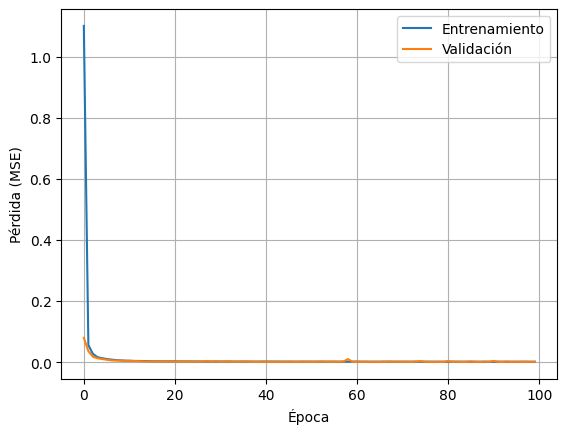

In [ ]:
#Curvas de pérdida durante el entrenamiento y validación
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('imágenes/loss.png', dpi=300, bbox_inches='tight')
plt.show()

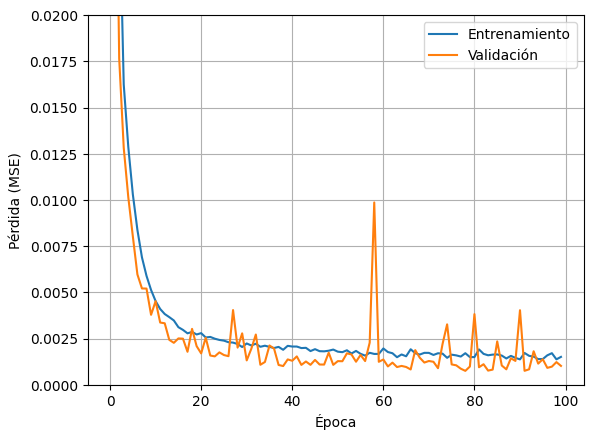

In [13]:
#Curvas de pérdida, pero vistas más de cerca
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.ylim(0, 0.02)
plt.legend()
plt.grid(True)
plt.savefig('imágenes/loss_zoom.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre='valores_reales_predichos.png'):
    #Predicciones en train
    y_pred_train = modelo.predict(X_train)
    if hasattr(y_pred_train, 'flatten'):
        y_pred_train = y_pred_train.flatten()

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Train:")
    print(f"MAE = {mae_train:.4f}")
    print(f"MSE = {mse_train:.4f}")
    print(f"R² = {r2_train:.4f}\n")

    #Predicciones en test
    y_pred_test = modelo.predict(X_test)
    if hasattr(y_pred_test, 'flatten'):
        y_pred_test = y_pred_test.flatten()

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print("Test:")
    print(f"MAE = {mae_test:.4f}")
    print(f"MSE = {mse_test:.4f}")
    print(f"R² = {r2_test:.4f}")

    #Valores reales vs. predichos
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Distancia comóvil real')
    plt.ylabel('Distancia comóvil predicha')
    plt.title('Valores reales vs. Valores predichos')
    plt.grid(True)
    plt.savefig(nombre, dpi=300, bbox_inches='tight')
    plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step
Train:
MAE = 0.0094
MSE = 0.0013
R² = 0.9908

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
Test:
MAE = 0.0100
MSE = 0.0016
R² = 0.9891


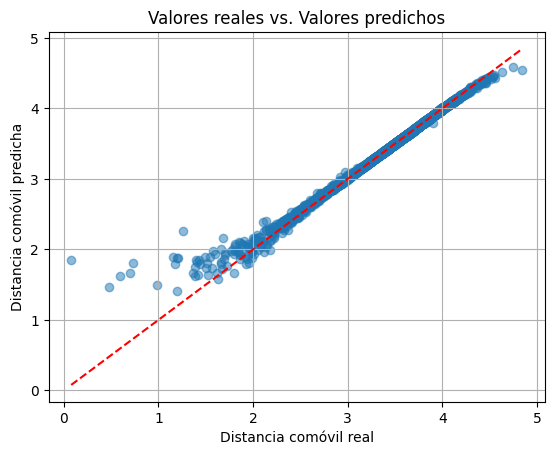

In [ ]:
evaluar_modelo(nn, X_train_scaled, y_train, X_test_scaled, y_test, 'imágenes/valores_reales_vs_predichos.png')

In [ ]:
#Guardar el modelo entrenado y el objeto scaler utilizado para normalizar los datos
nn.save('resources/modelo_distancia_comovil.h5')
joblib.dump(scaler, 'resources/scaler.pkl')

['resources/scaler.pkl']

## Probando el modelo con nuevos datos aleatorios

In [3]:
#Cargar el modelo ya entrenado y el scaler
model = load_model('resources/modelo_distancia_comovil.h5', compile=False)
scaler = joblib.load('resources/scaler.pkl')

In [ ]:
z = np.linspace(0.0, 3.0, 50) #Arreglo de 50 valores uniformemente distribuidos entre 0.0 y 3.0
H0 = 70.0 #Constante de Hubble
Omega_m = 0.3 #Densidad de materia
Omega_lambda = 0.7 #Densidad de energía oscura

#Arreglos para almacenar los valores reales y predichos
valores_predichos = np.zeros(len(z))
valores_reales = np.zeros(len(z))

#Se itera sobre todos los valores de z
for i in range(len(z)):
    #Calcular la distancia comóvil usando la función
    valores_reales[i] = distancia_comovil(z[i], H0, Omega_m, Omega_lambda)

    #Hacer la predicción con el modelo entrenado
    nuevo_dato = np.array([[z[i], H0, Omega_m, Omega_lambda]])
    nuevo_dato_df = pd.DataFrame(nuevo_dato, columns=['z', 'H0', 'Omega_m', 'Omega_lambda'])
    nuevo_dato_scaled = scaler.transform(nuevo_dato_df) 
    prediccion_log = model.predict(nuevo_dato_scaled).flatten()[0] 
    valores_predichos[i] = 10 ** prediccion_log #Invertir la transformación para obtener la distancia original

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

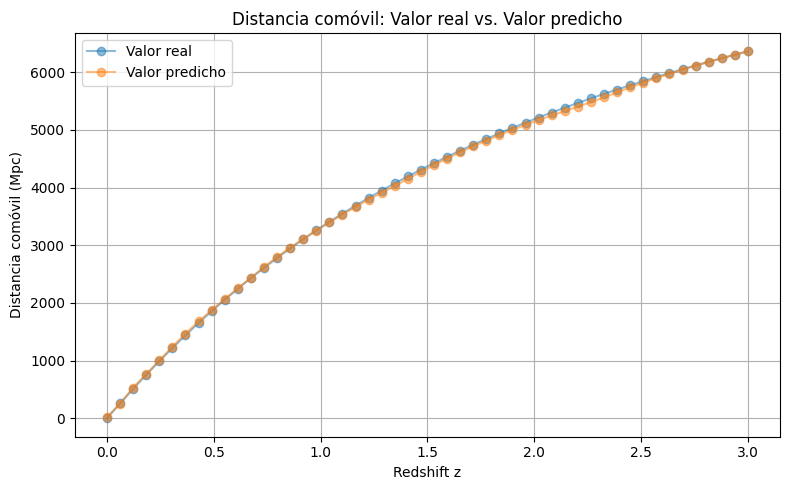

In [ ]:
#Gráfica de la comparación entre los valores reales y los predichos
plt.figure(figsize=(8,5))
plt.plot(z, valores_reales, label='Valor real', marker='o', alpha=0.5)
plt.plot(z, valores_predichos, label='Valor predicho', marker='o', alpha=0.5)
plt.xlabel("Redshift z")
plt.ylabel("Distancia comóvil (Mpc)")
plt.title("Distancia comóvil: Valor real vs. Valor predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('imágenes/pruebas_real_vs_predicho.png', dpi=300, bbox_inches='tight')
plt.show()